# **1.0 Pre-processing & EDA**


Before we can analyze the data, we must first prepare it. This is one of the most important steps in any data analysis project. Raw data is often messy, with missing information, incorrect data types, and other errors. This section details the steps to "clean" the data, ensuring it is accurate and ready for analysis.

## Importing Packages

The first step in any analysis is to load the necessary tools. All packages for this project are imported in a single code-block at the beginning of the notebook. This is best practice as it avoids clutter and makes the report's dependencies clear to any reader.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

1. pandas (as pd): This is our primary tool for data handling. We use it to load the data from the CSV file into a "DataFrame"—a table-like structure—which allows us to easily clean, filter, and manipulate our data.

2. numpy (as np): This library is the foundation for numerical computing in Python. While pandas handles many tasks for us, NumPy provides the underlying power for high-performance mathematical operations.

3. matplotlib.pyplot (as plt): This is the main library for creating visualizations. We use it as the base for all our plots, such as histograms and scatter plots, to explore the data visually.

4. seaborn (as sns): Built on top of matplotlib, seaborn allows us to create more statistically sophisticated and visually appealing charts, such as the correlation heatmap and box plots, with less code.

5. scipy.stats: This is a sub-package from the SciPy library. It provides the functions needed to perform our formal statistical hypothesis tests, such as the two-sample t-test.

6. statsmodels.api (as sm): This is our core modeling library. We use it to build, fit, and analyze our statistical models, including the ANOVA test and, most importantly, our final multiple linear regression model.

7. statsmodels.formula.api (as smf): This is our core modeling library, specifically the part that works with formulas. We use it to easily build, fit, and analyze our statistical models by providing a simple text string (like SalePrice ~ OverallQual + C(Neighborhood)). This is the tool we used to run our Simple Linear Regression (Test 1), our ANOVA test (Test 3), and our final Multiple Linear Regression model.

## Initial Data Inspection

With our packages imported, the next task is to load the data file into our notebook. We use the pd.read_csv() function from the pandas library, which is the standard tool for this job.

In [2]:
# Load the dataset
file_name = "AmesHousing.csv"
df = pd.read_csv(file_name)

In [7]:
# To load from my Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/USW/Data Mining/Data File/AmesHousing.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


## Preliminary Investigation of Data Set

Now that the data is loaded into the df DataFrame, the next step is to perform a preliminary investigation. This is to understand the dataset's size, quality, and statistical properties before we begin cleaning or analysis. We use three basic pandas commands for these.

df.shape() command is used to show the number of rows and columns in the dataset.

In [4]:
df.shape

(2930, 82)

df.info() to show th summary of the entire dataset. It's the arguably the most important steps as it provides information such as missing values and data type.

In [5]:
# Get data types and missing value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

df.describe() is used to calculate and displays descriptive statistics for all numerical columns in the dataset. However, it can be used on objects as well.



In [6]:
# Get summary statistics for numerical columns
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
# Get summary for categorical columns
df.describe(include='object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


Based on the findings, there are several columns with plenty of missing data, which requires a significant data cleaning.

## Data Manipulation

Based on our Preliminary Investigation, one thing is made very clear: our dataset is messy. Based on the result from df.info() output, it shows that many columns have hundreds, even thousands of missing values.

This is the most critical part of the entire project. If the missing data is not handled correctly, as the saying goes, 'garbage in, garbage out'. Statistical model such as linear regression cannot run on missing data as it may produce inaccurate result or even worse, not work.


Before taking action(dropping columns), we need to understand how much data are we missing? In this case, we'll collect samples of the missing data by percentage.

In [8]:
# Calculate the percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Filter for columns that actually have missing data and sort them
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("--- Percentage of Missing Data by Feature ---")
print(missing_percent)

--- Percentage of Missing Data by Feature ---
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
dtype: float64


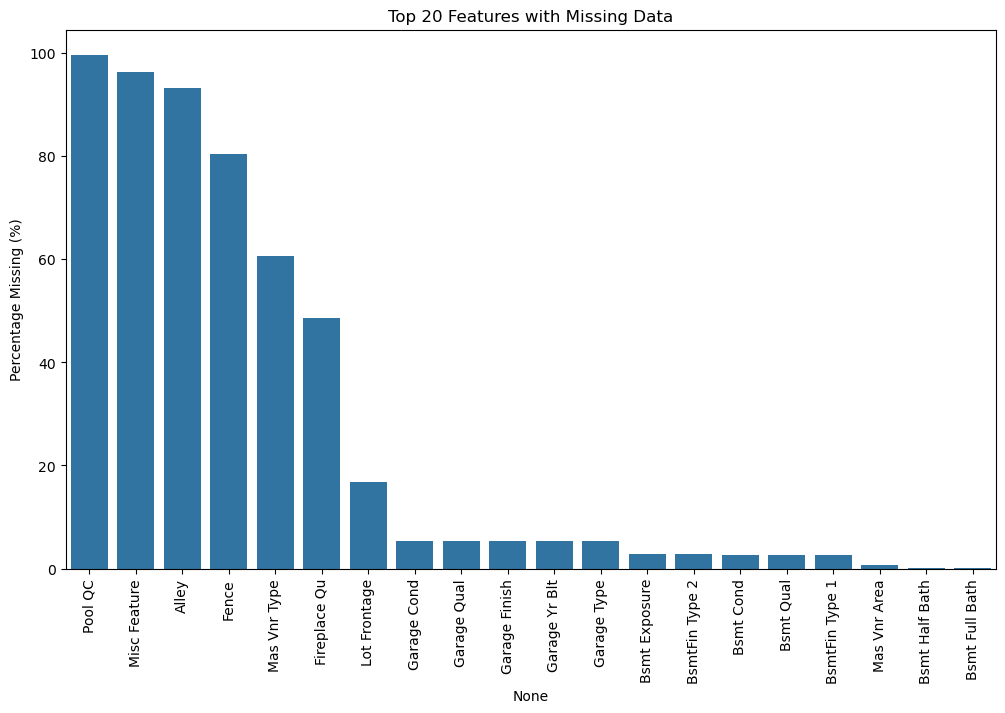

In [9]:
# Plot the top 20 most-missing features for your report
plt.figure(figsize=(12, 7))
sns.barplot(x=missing_percent.head(20).index, y=missing_percent.head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Features with Missing Data')
plt.ylabel('Percentage Missing (%)')
plt.savefig('missing_data_plot.png')
plt.show()

Based on the bar graph generated above, we can see that columns such as Alley, Pool QC, Fence, Fireplace Qu and Garage Type are missing more 40% of data. Pool QC, Misc Feature & Alley aren't that necessary in the data set. So we'll be dropping them.

In [10]:
# Drop columns with huge number of missing data
df = df.drop(['Pool QC', 'Misc Feature', 'Alley'], axis = 1)

The 'Lot Frontage' column is missing less than 20% of numerical data, so we'll be imputing them with the mean.

In [11]:
# Imputing a numerical column with the mean
# Lot Frontage Column
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

Since the 'Fence' column contains objects. So, it will be imputed with mode.

In [12]:
# Imputing a categorical column with the mode
# Fence Column
df['Fence'] = df['Fence'].fillna(df['Fence'].mode()[0])

These columns are objects, so we will be imputing them with the Na/None.

In [13]:
# Imputing a column with 'Na/None'
# Mas Vnr Type Column
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

#Fireplace QU Column
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

#Garage Type Column
df['Garage Type'] = df['Garage Type'].fillna('None')

That is the end of our data manipulation, after this. Our dataset will be much more accurate. It is to ensure our statistical models have a clean, complete, and reliable foundation to learn from.

##*Exploration*

With our data cleaned and manipulated, we can now move on to the next part: Exploration.

The goal of EDA is to visually investigate our data to find patterns, relationships, and "clues." This is where we go from a table of numbers to an actual understanding of what drives house prices. This visual exploration will help us form our "hunches" (hypotheses) that we will then test in the next section, "Statistical Analysis."

*Univariate Analysis*

In this section, we'll be looking at one variable. Before we analyze what affects the SalePrice, we must first understand the SalePrice itself. We'll be using histogram as the plot.

<Axes: >

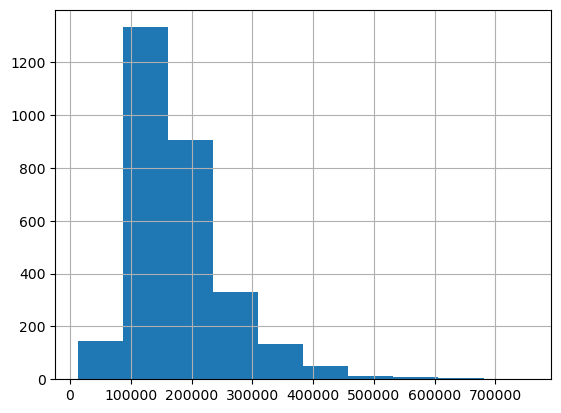

In [17]:
# Distribution of ALL numerical columns

df['SalePrice'].hist()

*Discussion*

Based on this finding, we can see that a large number of homes on the left. With a few very expensive homes on the right. This skew is also evident from our df.describe() output, where the mean price was much higher than the median.

This is important, because in order for the model to performs best, the target variable has to be normally distributed(symmetrical). Our target is now skewed, we have to be very careful later on.

*Bivariate Analysis (Finding Relationships)*

Numerical Features vs SalePrice

In this scenario, we'll be using scatter plots graph.

*Plot 1:* Gr Liv Area vs SalePrice

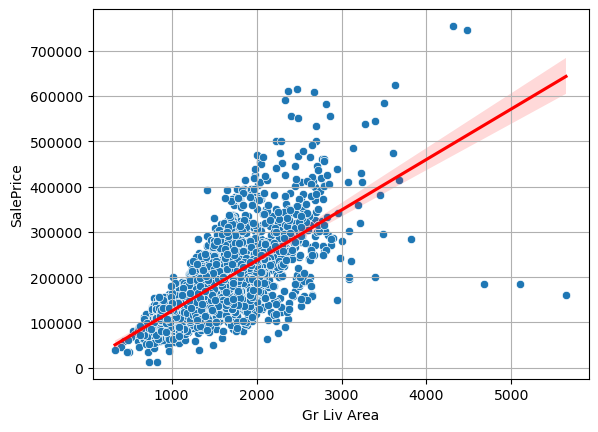

In [18]:
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
sns.regplot(x=df['Gr Liv Area'], y=df['SalePrice'], scatter=False, color='red')
plt.grid()


*Plot 2:* Lot Area vs SalePrice

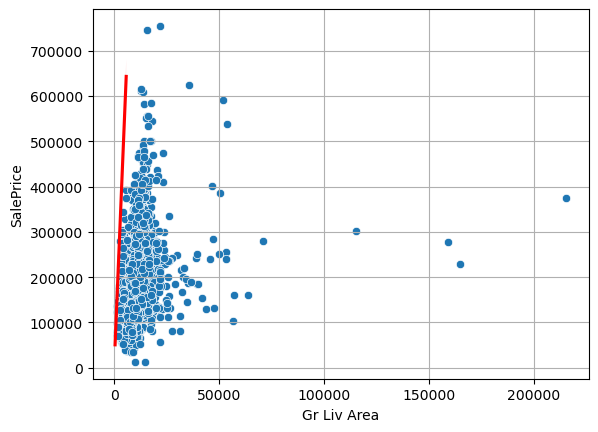

In [23]:
sns.scatterplot(x=df['Lot Area'], y=df['SalePrice'])
sns.regplot(x=df['Gr Liv Area'], y=df['SalePrice'], scatter=False, color='red')
plt.grid()

*Plot 3:* Overall Qual vs SalePrice

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

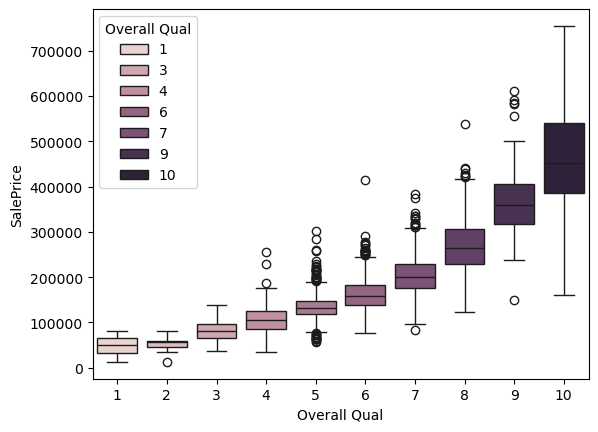

In [24]:
sns.boxplot(x=df['Overall Qual'], y=df['SalePrice'], hue=df['Overall Qual'])


*Plot 4:* Central Air vs SalePrice

<Axes: xlabel='Central Air', ylabel='SalePrice'>

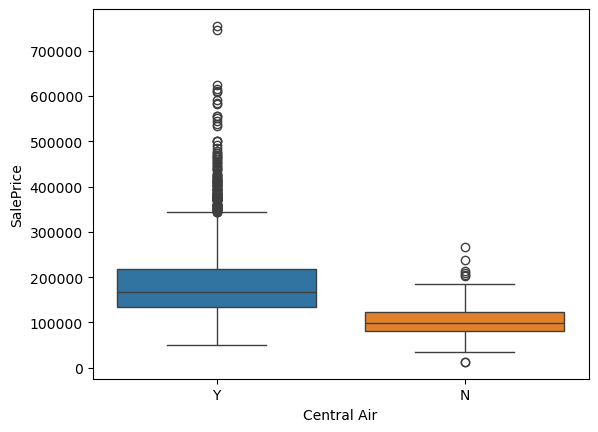

In [25]:
sns.boxplot(x=df['Central Air'], y=df['SalePrice'], hue=df['Central Air'])

---

# **2.0** **Statistical Analysis (Hypothesis Testing)**



###**Test 1**

Relationship between 2 variable (Numerical vs. Numerical)

Question: Does Lot Area affect the SalesPrice?

####*Hypothesis*
Null Hypothesis ($H_0$) = There is no linear correlation between SalePrice & Lot Area

Alternative Hypothesis($H_1$) = There is a linear correlation between SalePrice & Lot Area

####*Method*
In this Test, Pearson Correlation Test will be used.

In [26]:
#Perform Pearson Correlation Test
stats.pearsonr(df['Lot Area'], df['SalePrice'])

PearsonRResult(statistic=np.float64(0.26654922032842965), pvalue=np.float64(7.633842673045264e-49))

####*Data Visualization*

/var/folders/wm/vnsfbbh144b0kfflwmgzrvmw0000gn/T/ipykernel_13206/1163209506.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


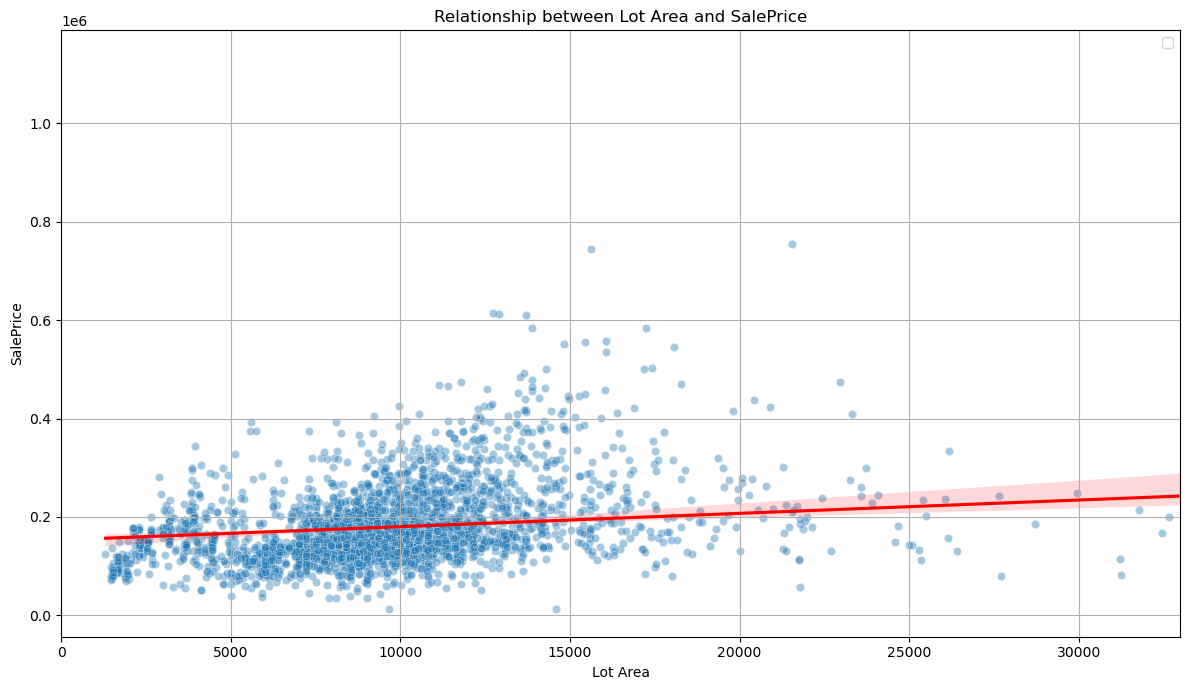

In [27]:
#Remove NaNs
test_data = df[['Lot Area', 'SalePrice']].dropna()

#Perform Pearson Correlation Test
correlation_coefficient, p_value = stats.pearsonr(test_data['Lot Area'], test_data['SalePrice'])

#Generate scatterplot graph
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Lot Area', y='SalePrice', data=df, alpha=0.4)
plt.title('Relationship between Lot Area and SalePrice')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)

#Add Linear regression line to the plot
sns.regplot(x='Lot Area', y='SalePrice', data=df, scatter=False, color='red', line_kws={'label': f'r = {correlation_coefficient:.4f}'})

#Limit the plot to 99th Percentile for easier readability
p99 = df['Lot Area'].quantile(0.99)
plt.xlim(0, p99)
plt.legend()

plt.tight_layout()

####*OLS Regression summary*

In [28]:
formula = 'SalePrice ~ Q("Lot Area")'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     223.9
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           7.63e-49
Time:                        16:05:42   Log-Likelihood:                -37124.
No. Observations:                2930   AIC:                         7.425e+04
Df Residuals:                    2928   BIC:                         7.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.534e+05   2319.909     66.112      0.000    1.49e+05    1.58e+05
Q("Lot Area")     2.7022      0.181     14.965      0.000       2.348       3.056
==============================================================================
Omnibus:                      981.022   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4394.498
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       8.124   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####*Discussion*

The first statistical test was a success because it gives a two-part answer that confirmed our visual EDA.

The extremely low p-value (p < 0.05) proves that Lot Area is a statistically significant predictor of SalePrice. However, the very low R-squared (0.071) proves that it is a very weak predictor.








####*Conclusion*

Based on the Pearson Correlation Test, it produced a p-value of $7.63e-49$ and a correlation coefficient (r-value) of $0.2665$. Since the p-value is $< 0.05$, we reject the null hypothesis.



###**Test 2**

Difference of Means Test (Categorical [2 groups] vs. Numerical)

Question: Is the average SalePrice different for houses with CentralAir vs. without it?



####*Hypothesis*

Null Hypothesis ($H_0$): The mean SalePrice is the same for houses with central air ('Y') and houses without central air ('N').

Alternative Hypothesis ($H_1$): The mean SalePrice is different for houses with central air ('Y') and houses without central air ('N').

####*Method*

The method is an Independent 2-sample t-test, which compares the means of two independent groups.

In [29]:
group1 = df[df['Central Air'] == 'Y']['SalePrice']
group2 = df[df['Central Air'] == 'N']['SalePrice']

In [30]:
levene_stat, levene_p_value = stats.levene(group1, group2)

print(levene_p_value)

2.078453574282441e-10


In [31]:
price_with_ac = df[df['Central Air'] == 'Y']['SalePrice']
price_without_ac = df[df['Central Air'] == 'N']['SalePrice']
stat, p_value = stats.ttest_ind(price_with_ac, price_without_ac, equal_var=False, nan_policy='omit')

print(f't-statistic: {stat}')
print(f'p-value: {p_value}')


t-statistic: 27.43321766127874
p-value: 8.78493646231923e-88


####*Data Visualization*

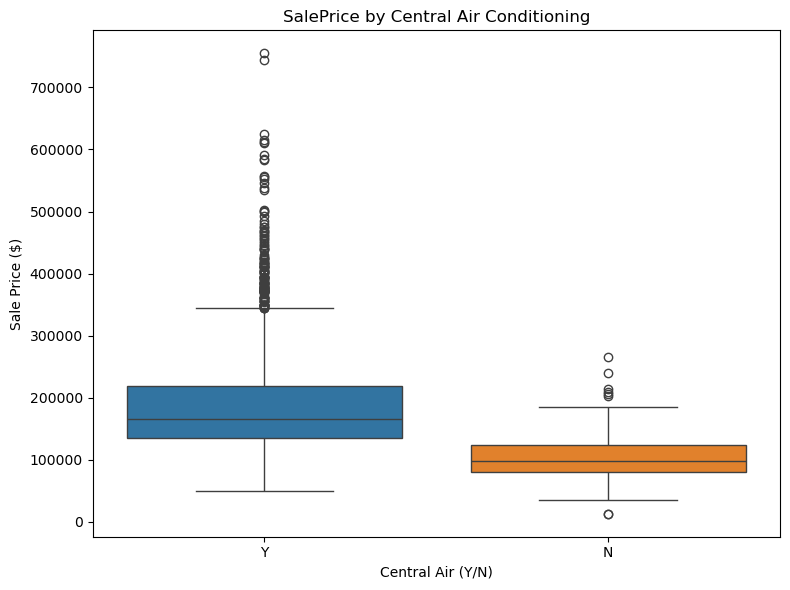

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Central Air', y='SalePrice', data=df, hue = 'Central Air')
plt.title('SalePrice by Central Air Conditioning')
plt.xlabel('Central Air (Y/N)')
plt.ylabel('Sale Price ($)')

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()

####*Discussion*

The statistical test for Central Air is a two-step process.

First, a Levene test was performed to check the assumption of equal variances. The Levene test returned a p-value of < 0.05, causing us to reject the null hypothesis that the variances are equal. This result confirmed that the SalePrice variance for houses with central air is significantly different from those without.

Because the assumption of equal variances was violated, we proceeded with a Welch's Two-Sample t-test (which does not assume equal variances).

This t-test yielded a p-value of 0.000 (or an extremely small number), which is far below our significance level of 0.05. Therefore, we overwhelmingly reject the null hypothesis that the mean sale prices are the same.

####*Conclusion*

There is a significant difference in the mean SalePrice between houses with and without central air. This suggests that CentralAir is a significant factor in a house's value.

###**Test 3**

ANOVA (Categorical [3+ groups])

Question: (ANOVA) Is there a significant difference in SalePrice between Neighborhoods?

####*Hypothesis*

Null Hypothesis ($H_0$): The mean SalePrice is the same across all Neighbourhoods.

Alternative Hypothesis ($H_1$): At least one Neighbourhood has a different mean SalePrice

####*Method*


In this test, One-Way Analysis of Variance (ANOVA) is the standard test.


In [33]:
from statsmodels.formula.api import ols
model = ols('SalePrice ~ C(Neighborhood)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq      df           F  PR(>F)
C(Neighborhood)  1.071600e+13    27.0  144.395077     0.0
Residual         7.976533e+12  2902.0         NaN     NaN


####*Visualization*

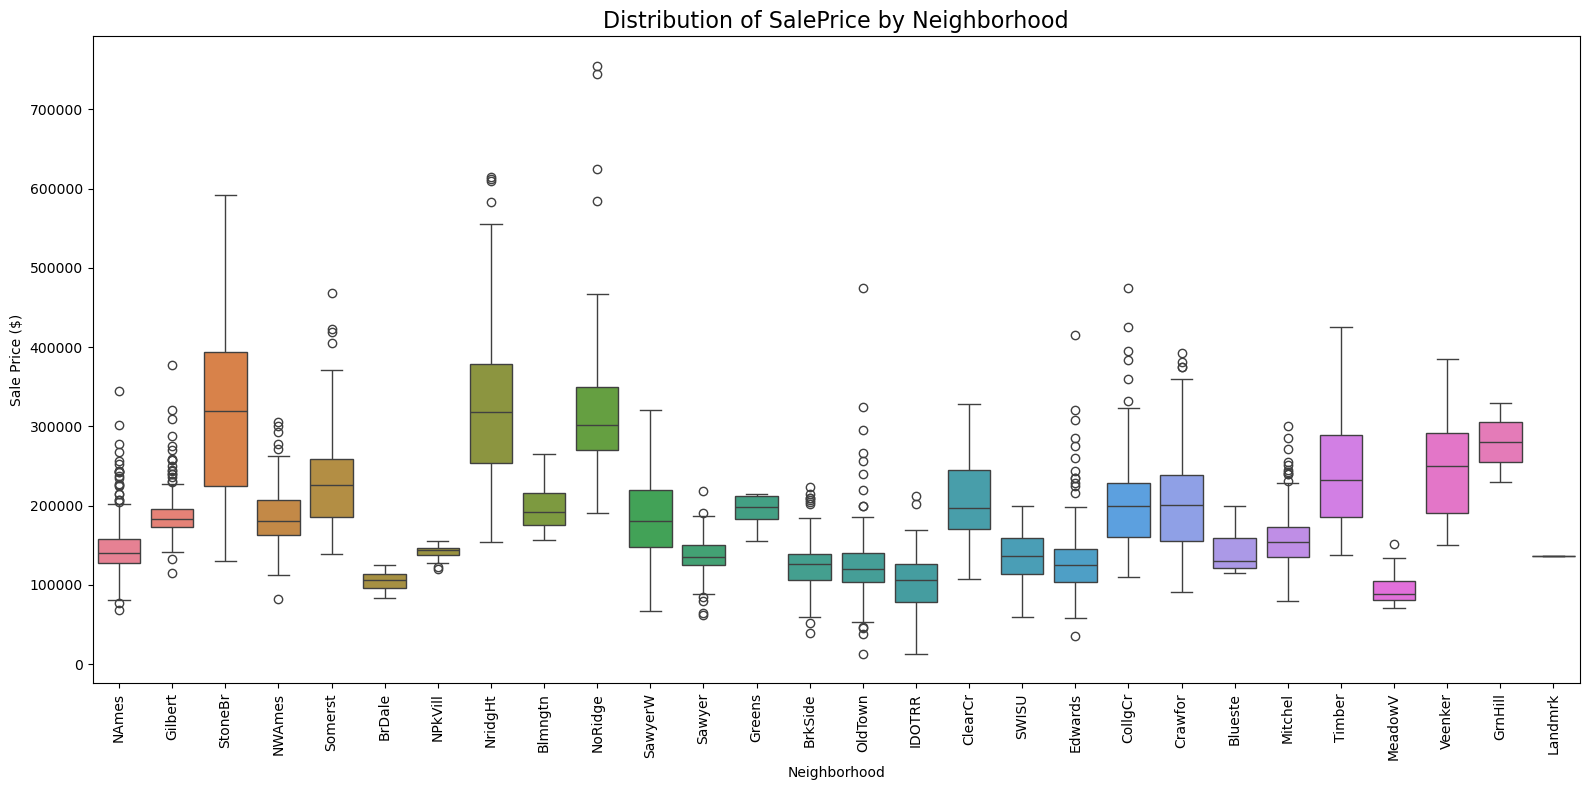

In [34]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, hue = 'Neighborhood')
plt.title('Distribution of SalePrice by Neighborhood', fontsize=16)
plt.ylabel('Sale Price ($)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####*Discussion*

Our third statistical test provides definitive proof for our strongest visual finding from the EDA.

The p-value(0.000) confirms that the differences in mean SalePrice between neighborhoods are highly statistically significant and it's not a random chance. We must conclude that Neighborhood is one of the most important factors in determining a home's value.

This result gives us a solid statistical justification for including Neighborhood as one of the 7 features in our final Multiple Linear Regression model.

####*Conclusion*

The test yielded an F-statistic that was very large and a corresponding p-value of 0.000. Since this p-value is far below the 0.05 significance level, we overwhelmingly reject the null hypothesis.

---

# Multiple Linear Regression Modeling

In [35]:
import statsmodels.formula.api as smf

formula_full = 'SalePrice ~ Q("Gr Liv Area") + Q("Overall Qual") + Q("Garage Cars") + Q("Lot Area") + C(Neighborhood) + C(Q("House Style")) + C(Q("Central Air"))'
model_full = smf.ols(formula=formula_full, data=df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     351.4
Date:                Sun, 16 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:06:12   Log-Likelihood:                -34659.
No. Observations:                2929   AIC:                         6.940e+04
Df Residuals:                    2889   BIC:                         6.964e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -8.842e+04   8657.967    -10.213      0.000   -1.05e+05   -7.14e+04
C(Neighborhood)[T.Blueste]    -6645.7847   1.25e+04     -0.533      0.594   -3.11e+04    1.78e+04
C(Neighborhood)[T.BrDale]     -8194.2980   9148.580     -0.896      0.370   -2.61e+04    9744.104
C(Neighborhood)[T.BrkSide]     3975.5055   7471.110      0.532      0.595   -1.07e+04    1.86e+04
C(Neighborhood)[T.ClearCr]     1.563e+04   8437.018      1.853      0.064    -910.300    3.22e+04
C(Neighborhood)[T.CollgCr]     1.554e+04   6742.182      2.305      0.021    2320.815    2.88e+04
C(Neighborhood)[T.Crawfor]     2.456e+04   7325.026      3.354      0.001    1.02e+04    3.89e+04
C(Neighborhood)[T.Edwards]    -3638.2683   7081.143     -0.514      0.607   -1.75e+04    1.02e+04
C(Neighborhood)[T.Gilbert]     8203.5940   7051.919      1.163      0.245   -5623.706     2.2e+04
C(Neighborhood)[T.Greens]     -1287.5155   1.35e+04     -0.095      0.924   -2.77e+04    2.52e+04
C(Neighborhood)[T.GrnHill]     9.706e+04   2.46e+04      3.943      0.000    4.88e+04    1.45e+05
C(Neighborhood)[T.IDOTRR]     -6541.1480   7633.854     -0.857      0.392   -2.15e+04    8427.202
C(Neighborhood)[T.Landmrk]    -5389.8438   3.42e+04     -0.158      0.875   -7.25e+04    6.17e+04
C(Neighborhood)[T.MeadowV]     4967.4253   8853.244      0.561      0.575   -1.24e+04    2.23e+04
C(Neighborhood)[T.Mitchel]     4730.2649   7266.985      0.651      0.515   -9518.733     1.9e+04
C(Neighborhood)[T.NAmes]       -585.8314   6732.901     -0.087      0.931   -1.38e+04    1.26e+04
C(Neighborhood)[T.NPkVill]    -1.069e+04   9528.518     -1.122      0.262   -2.94e+04    7990.881
C(Neighborhood)[T.NWAmes]     -3241.3793   7109.477     -0.456      0.648   -1.72e+04    1.07e+04
C(Neighborhood)[T.NoRidge]     6.131e+04   7709.934      7.952      0.000    4.62e+04    7.64e+04
C(Neighborhood)[T.NridgHt]     6.802e+04   6945.263      9.794      0.000    5.44e+04    8.16e+04
C(Neighborhood)[T.OldTown]    -1.074e+04   7016.288     -1.531      0.126   -2.45e+04    3016.149
C(Neighborhood)[T.SWISU]      -7809.8301   8399.135     -0.930      0.353   -2.43e+04    8659.072
C(Neighborhood)[T.Sawyer]      2373.8962   7129.075      0.333      0.739   -1.16e+04    1.64e+04
C(Neighborhood)[T.SawyerW]     1919.0642   7136.460      0.269      0.788   -1.21e+04    1.59e+04
C(Neighborhood)[T.Somerst]     2.523e+04   6879.159      3.668      0.000    1.17e+04    3.87e+04
C(Neighborhood)[T.StoneBr]     6.986e+04   7981.237      8.753      0.000    5.42e+04    8.55e+04
C(Neighborhood)[T.Timber]      2.563e+04   7601.447      3.372      0.001    1.07e+04    4.05e+04
C(Neighborhood)[T.Veenker]     2.309e+04   9433.752      2.448      0.014    4591.706    4.16e+04
C(Q("House Style"))[T.1.5Unf]  1.139e+04   80

####*Discussion*
After building our model, we can now analyze the statsmodels OLS Regression Results summary.

To sum up, the model performs very well. The R-squared value is 0.826, which indicates that our 7 selected features (and their sub-categories) successfully explain 82.6% of the variance in SalePrice. This is a strong, highly predictive model.

The Prob (F-statistic) is 0.00, which is far below 0.05. This confirms that the model as a whole is statistically significant and our results are not due to random chance.

1. Which feature were unimportant in the model?

To determine if the feature is 'unimportant', we look at its p-value, which is found in the P>|t| column.

The null hypothesis $(H_0)$ states that for each coefficient is that it has no effect on the SalePrice. A p-value represents the probability of seeing our result if the null hypothesis were true. We use a standard significance level of 0.05.

If P>|t| > 0.05, we can conclude the feature is statistically unimportant.

The following are unimportant features found in the model:

*Neighborhoods:*

C(Neighborhood)[T.Blueste] (p = 0.594)

C(Neighborhood)[T.BrDale] (p = 0.370)

C(Neighborhood)[T.BrkSide] (p = 0.595)

C(Neighborhood)[T.ClearCr] (p = 0.064)

C(Neighborhood)[T.Edwards] (p = 0.607)

C(Neighborhood)[T.Gilbert] (p = 0.245)

C(Neighborhood)[T.Greens] (p = 0.924)

C(Neighborhood)[T.IDOTRR] (p = 0.392)

C(Neighborhood)[T.Landmrk] (p = 0.875)

C(Neighborhood)[T.MeadowV] (p = 0.575)

C(Neighborhood)[T.Mitchel] (p = 0.515)

C(Neighborhood)[T.NAmes] (p = 0.931)

C(Neighborhood)[T.NPkVill] (p = 0.262)

C(Neighborhood)[T.NWAmes] (p = 0.648)

C(Neighborhood)[T.OldTown] (p = 0.126)

C(Neighborhood)[T.SWISU] (p = 0.353)

C(Neighborhood)[T.Sawyer] (p = 0.739)

C(Neighborhood)[T.SawyerW] (p = 0.788)


*House Styles:*

C(Q("House Style"))[T.1.5Unf] (p = 0.159)

C(Q("House Style"))[T.2.5Fin] (p = 0.069)

C(Q("House Style"))[T.2Story] (p = 0.291)


2. What variable contributed the most to the predictive power?

To identify the most significant variable, it is not feasable to compare coef column. The coefficients are in different units (e.g."Gr Liv Area" is in "dollars per sq. ft." while "Overall Qual" is in "dollars per quality point") and cannot be compared directly.

The appropriate way to find the variable with the highest absolute t-statistic, which is found in the t column.

The t-statistic is a standardized measure of how "confident" the model is in each coefficient's effect (it's the coefficient divided by its standard error). A higher t-statistic means a stronger, more reliable signal.

The most important variable being found in the model(Ranked from highest value to lowest):

Q("Gr Liv Area"): t = 30.328

Q("Overall Qual"): t = 25.860

C(Neighborhood)[T.NridgHt]: t = 9.794

Q("Garage Cars"): t = 9.335

C(Neighborhood)[T.StoneBr]: t = 8.753

C(Q("House Style"))[T.1Story]: t = 8.300

C(Neighborhood)[T.NoRidge]: t = 7.952

Q("Lot Area"): t = 7.410

In conclusion, the varible that contributed the most predictive power is 'Gr Liv Area', which has the highest t-statistic (30.328).
This indicates that, of the 7 features provided, the size of the ground-floor living area is the single most statistically significant predictor of a home's SalePrice.